# Step 1
## What is the relationship between communication (words per minute + word variance) and performance (match outcome + kills per minute)

In [2]:
# based on this tutorial : http://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

mac_filename = '/Users/ett506/Documents/proj-league/data/full_team_log.csv'
windows_filename = r"D:\Projects\UG-league-project\data\full-summary-stats.csv"

# import the data
full_summary_stats_df = pd.read_csv(mac_filename)

full_summary_stats_df.head()

,team_number,team_size,match_id,outcome,match_outcome,duration_seconds,match_duration,kills_per_minute,mean_wpm,variance_wpm,...,cohesion_50_percent,cohesion_75_percent,cohesion_max,satisfaction_mean,satisfaction_std,satisfaction_min,satisfaction_25_percent,satisfaction_50_percent,satisfaction_75_percent,satisfaction_max
0,1,3,5056494058,l,0,1509.8,25:15:00,0.713,71.615385,1152.159763,...,6.000000,6.250000,6.500000,6.166667,0.803638,5.25,5.875,6.50,6.625,6.75
1,2,5,5064844365,w,1,1778.1,29:39:00,1.484,84.233333,803.912222,...,6.000000,6.000000,6.833333,6.700000,0.325960,6.25,6.500,6.75,7.000,7.00
2,3,3,5081077877,w,1,1599.8,26:40:00,0.862,114.666667,1561.111111,...,6.666667,6.750000,6.833333,6.916667,0.144338,6.75,6.875,7.00,7.000,7.00
3,4,5,5060243044,w,1,1388.6,23:08:00,1.470,100.500000,858.500000,...,5.833333,6.166667,6.166667,6.200000,0.647109,5.50,5.750,6.00,6.750,7.00
4,5,5,5062654604,l,1,1175.9,33:04:00,0.877,132.100000,1205.790000,...,6.833333,7.000000,7.000000,6.800000,0.447214,6.00,7.000,7.00,7.000,7.00


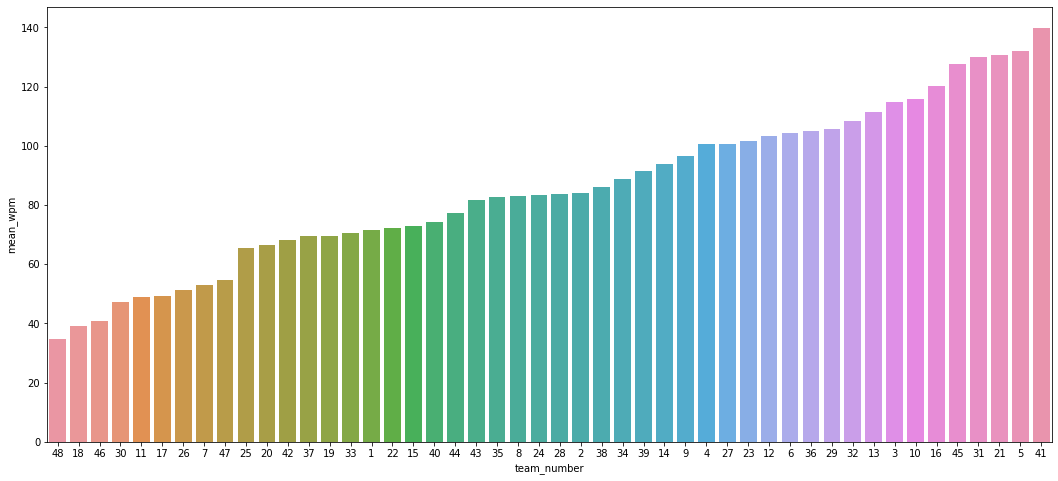

In [2]:
plt.figure(figsize=(18,8))

sns.barplot(data = full_summary_stats_df, x ='team_number', y = 'mean_wpm', order = full_summary_stats_df.sort_values('mean_wpm').team_number)

plt.savefig('../graphs/mean_wpm_by_team.png')

*Visualise the relationship*


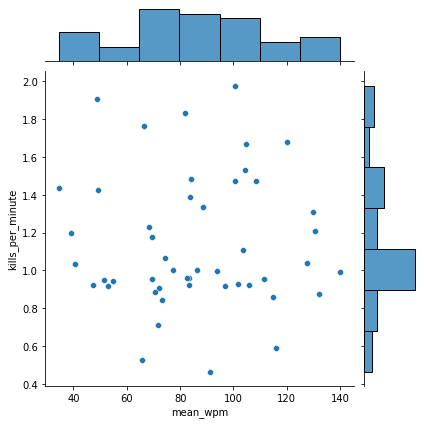

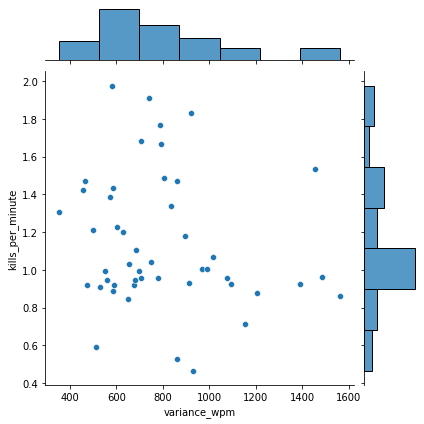

In [8]:
# relationship between mean wpm and kpm
ax1 = sns.jointplot(data = full_summary_stats_df, x = "mean_wpm", y = "kills_per_minute")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")
#ax1.savefig(r"../graphs/wpm-and-kpm.png")

# relationship between mean wpm and kpm
ax1 = sns.jointplot(data = full_summary_stats_df, x = "variance_wpm", y = "kills_per_minute")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")
#ax1.savefig(r"../graphs/word-variance-and-kpm.png")





### words per minute and cohesion

- kendall's tau:  0.24251629826966115
- p-value:  0.015909837637913368
- Significant correlation found


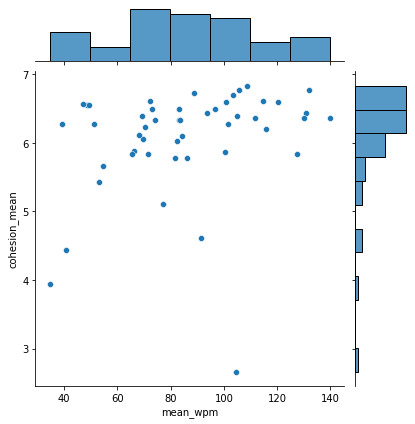

In [5]:
# relationship between mean wpm and outcome
ax1 = sns.jointplot(data = full_summary_stats_df, x = "mean_wpm", y = "cohesion_mean")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")

plt.savefig('../graphs/wpm_cohesion_jointplot.png')

### words per minute and outcome

- correlation: 0.24653986735301064  
- p-value: 0.09117353451824775
- No significant correlation found


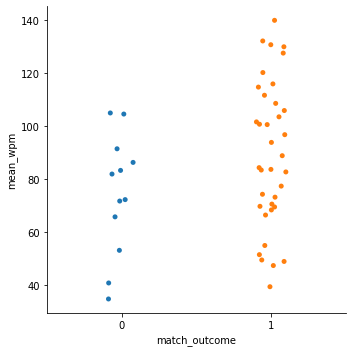

In [22]:
wpm_outcome = sns.catplot(data = full_summary_stats_df, x = "match_outcome", y = "mean_wpm")

In [32]:
x = full_summary_stats_df["match_outcome"].values

y = full_summary_stats_df["mean_wpm"].values

#calculate point-biserial correlation between mean wpm and match outcome
biserial_cor = stats.pointbiserialr(x, y)
print("correlation:", biserial_cor[0], " p-value:", biserial_cor[1])

if biserial_cor[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")


correlation: 0.24653986735301064  p-value: 0.09117353451824775
No significant correlation found


### wpm and satisfaction

- Pearson's r:  0.25313088728303823
- p-value:  0.08257975159359827
- No significant correlation found

In [35]:
# get column of interest
mean_wpm_array = full_summary_stats_df["mean_wpm"].values
mean_satisfaction_array = full_summary_stats_df["satisfaction_mean"].values

# calculate Pearsons correlation with p value ; for wpm and kpm

calculate_pearsons_r = scipy.stats.pearsonr(mean_wpm_array, mean_satisfaction_array)

print("Pearson's r: ", calculate_pearsons_r[0])
print("p-value: ", calculate_pearsons_r[1])

if calculate_pearsons_r[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

Pearson's r:  0.25313088728303823
p-value:  0.08257975159359827
No significant correlation found


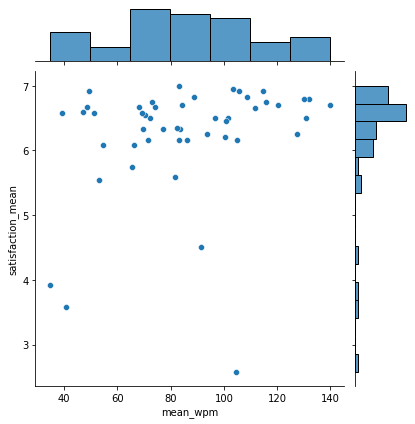

In [7]:
# relationship between mean wpm and outcome
ax1 = sns.jointplot(data = full_summary_stats_df, x = "mean_wpm", y = "satisfaction_mean")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")

plt.savefig('../graphs/wpm_satisfcation_jointplot.png')

### cohesion and outcome

- correlation: 0.5617168989113088  
- p-value: 3.266179136820155e-05
- Significant correlation found

In [33]:
x = full_summary_stats_df["match_outcome"].values

y = full_summary_stats_df["cohesion_mean"].values

#calculate point-biserial correlation between mean wpm and match outcome
biserial_cor = stats.pointbiserialr(x, y)
print("correlation:", biserial_cor[0], " p-value:", biserial_cor[1])

if biserial_cor[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

correlation: 0.5617168989113088  p-value: 3.266179136820155e-05
Significant correlation found


### cohesion and satisfaction

- kendall's tau:  0.5810331170000481
- p-value:  1.1780601105141915e-08
- significant correlation found


In [34]:
# get column of interest
mean_cohesion_array = full_summary_stats_df["cohesion_mean"].values
mean_satisfaction_array = full_summary_stats_df["satisfaction_mean"].values

# calculate kendall's tau correlation; for variance of words and kpm
calculate_kendalls_tau = scipy.stats.kendalltau(mean_cohesion_array, mean_satisfaction_array)

print("kendall's tau: ", calculate_kendalls_tau[0])
print("p-value: ", calculate_kendalls_tau[1])

if calculate_kendalls_tau[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

kendall's tau:  0.5810331170000481
p-value:  1.1780601105141915e-08
Significant correlation found


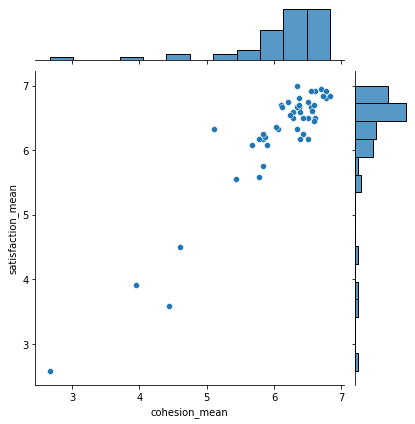

In [8]:
# relationship between mean wpm and outcome
ax1 = sns.jointplot(data = full_summary_stats_df, x = "cohesion_mean", y = "satisfaction_mean")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")

plt.savefig('../graphs/cohesion_satisfcation_jointplot.png')

*check if the relationship is significant*

**calculate correlation between words per minute and kills per minute**

In [9]:
# retrieve column of interest
mean_cohesion_column = full_summary_stats_df.loc[:, "cohesion_mean"]
mean_wpm_column = full_summary_stats_df.loc[:, "mean_wpm"]
dist_communication_column = full_summary_stats_df.loc[:, "variance_wpm"]
mean_kpm_column = full_summary_stats_df.loc[:, "kills_per_minute"]

# convert column into array
mean_cohesion_array = mean_cohesion_column.values
mean_wpm_array = mean_wpm_column.values
dist_communication_array = dist_communication_column.values
mean_kpm_array = mean_kpm_column.values


### Pearson's r
- assumptions: For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

In [10]:
# calculate Pearsons correlation with p value ; for wpm and kpm

calculate_pearsons_r = scipy.stats.pearsonr(mean_wpm_array, mean_kpm_array)

print("Pearson's r: ", calculate_pearsons_r[0])
print("p-value: ", calculate_pearsons_r[1])

if calculate_pearsons_r[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

Pearson's r:  -0.006819297069725283
p-value:  0.9633097735789218
No significant correlation found


**calculate correlation between variance of words and kills per minute**


Kendall's tau

    assumptions: monotonicity (the relationship between the two variables follows the general direction), fails the assumptions of pearsons
    https://www.statstest.com/kendalls-tau/



In [11]:
# calculate kendall's tau correlation; for variance of words and kpm
calculate_kendalls_tau = scipy.stats.kendalltau(dist_communication_array, mean_kpm_array)

print("kendall's tau: ", calculate_kendalls_tau[0])
print("p-value: ", calculate_kendalls_tau[1])

if calculate_kendalls_tau[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

kendall's tau:  -0.10022173934461917
p-value:  0.31519151937692413
No significant correlation found


## Calculate partial correlations 

Cohesion and Match outcome controlling for WPM

In [3]:
import pingouin as pg

# partial correlation for cohesion and match outcome, controlling for wpm 
cohesion_outcome_wpm = pg.partial_corr(data=full_summary_stats_df, x='cohesion_mean', y='match_outcome', covar='mean_wpm')

# partial correlation for cohesion and match outcome, controlling for satisfaction
cohesion_outcome_satisfaction = pg.partial_corr(data=full_summary_stats_df, x='cohesion_mean', y='match_outcome', covar='satisfaction_mean')

wpm_cohesion_satisfaction = pg.partial_corr(data=full_summary_stats_df, x = 'mean_wpm', y = 'cohesion_mean', covar = 'satisfaction_mean')

In [4]:
wpm_cohesion_satisfaction

,n,r,CI95%,p-val
pearson,48,0.03542,"[-0.25, 0.32]",0.813149


**calculate logistic regression of words per minute and match outcome**

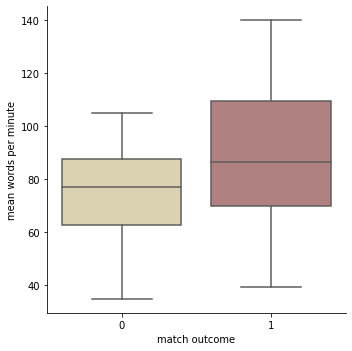

In [12]:
# relationship between mean wpm and match outcome
#ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "meanWordsPerMinute", kind = "box", notch = True, color = "blue")
ax2 = sns.catplot(data = full_summary_stats_df, x = "match_outcome", y = "mean_wpm", kind = "box", palette = "pink_r")

ax2.set(xlabel = "match outcome", ylabel = "mean words per minute")

#ax2.savefig(r"../graphs/wpm-and-match-outcome.png")

## find notches of 95% CI
## get p-value
## run t-test

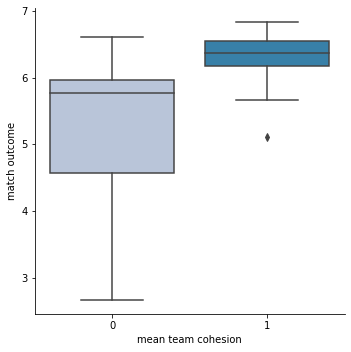

In [9]:
# relationship between mean wpm and match outcome
#ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "cohesion_mean", kind = "box", notch = True)

ax2 = sns.catplot(data = full_summary_stats_df, x = "match_outcome", y = "cohesion_mean", kind = "box", palette = "PuBu")
ax2.set(xlabel = "mean team cohesion", ylabel = "match outcome")
plt.savefig('../graphs/cohesion_and_matchoutcome.png')

In [ ]:
e = 24.5 o = 36 : (-11.5)^2 = 132.25/24.5 == 5.3979
e = 24.5 0 = 13 (11.5^2) = 132.25/24.5 == 5.3979

chi square = 10.7958

# Running a logistic regression of comm freq. and cohesion on match outcome
https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

‘Iterations‘ refer to the number of times the model iterates over the data, trying to optimise the model. By default, the maximum number of iterations performed is 35, after which the optimisation fails.

In [19]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [17]:
# load the dataset
#full_summary_stats_df = pd.read_csv(r"D:\Projects\UG-league-project\data\full-summary-stats.csv")

# define the dependent and independent variables
Xtrain = full_summary_stats_df[["mean_wpm", "cohesion_mean"]]
ytrain = full_summary_stats_df[["match_outcome"]]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.527571
         Iterations 5


In [18]:
# get the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:          match_outcome   No. Observations:                   48
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:                 0.06182
Time:                        16:04:43   Log-Likelihood:                -25.323
converged:                       True   LL-Null:                       -26.992
Covariance Type:            nonrobust   LLR p-value:                   0.06772
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
mean_wpm          0.0028      0.013      0.214      0.831      -0.023       0.029
cohesion_mean     0.1677      0.191      0.877      0.380      -0.207       0.542


In [11]:
# convert log odds to odds ratio for easier interpretation
log_reg_odds = pd.DataFrame(np.exp(log_reg.params), columns= ['OR'])
log_reg_odds['z-value']= log_reg.pvalues
log_reg_odds[['2.5%', '97.5%']] = np.exp(log_reg.conf_int())

log_reg_odds

,OR,z-value,2.5%,97.5%
meanWordsPerMinute,1.006548,0.637742,0.979572,1.034267
cohesion_mean,1.127809,0.527383,0.776683,1.637675
